In [132]:
# load breaset cancer data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [133]:
# cancer to DataFrame
import pandas as pd
import numpy as np

data = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer['feature_names'], ["target"]))
#data.head()

In [134]:
# X: data
x = data.drop(["target"], axis=1)
#x.head()


In [135]:
#Y: class
y = data["target"].astype(int)
#y.head()

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x) # x_train data scaling
#print(x)
#print(x_test[0])


In [137]:
# Cross validation KFold 사용
from sklearn.model_selection import KFold
import numpy as np
# eval_size = 0.10
kf = KFold(n_splits = 5) # 5 Fold 사용

# KFold Test data , train data 랜덤으로 나눈다.
for train_index, test_index in kf.split(x): 
    x_train , x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [138]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators =1) # 나무의 개수 = 1
clf1 = RandomForestClassifier(n_estimators =5) # 나무의 개수 = 5
clf2 = RandomForestClassifier(n_estimators =10) # 나무의 개수 = 10


clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
random_forest_pred = clf.predict(x_test)
random_forest_pred1 = clf1.predict(x_test)
random_forest_pred2 = clf2.predict(x_test)


In [140]:
# confusion matrix 
import pandas as pd

pd.crosstab(y_test,random_forest_pred, rownames = ['True'],colnames = ['Predicted'],margins=True)



Predicted,0,1,All
True,,,
0,24,2,26
1,6,81,87
All,30,83,113


In [141]:
from sklearn.metrics import accuracy_score
print("정확도 %.2f" %accuracy_score(y_test,random_forest_pred)) # accuracy_score 출력
print("정확도 %.2f" %accuracy_score(y_test,random_forest_pred1)) # accuracy_score 출
print("정확도 %.2f" %accuracy_score(y_test,random_forest_pred2)) # accuracy_score 출

정확도 0.93
정확도 0.97
정확도 0.97


[0.         0.07692308 1.        ]
[0.         0.93103448 1.        ]
[2. 1. 0.]
0.927055702917772


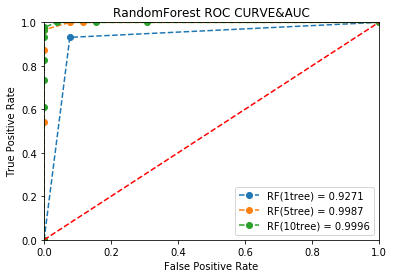

In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pylab as plt

fpr, tpr, threshold = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
fpr1, tpr1, threshold1 = roc_curve(y_test, clf1.predict_proba(x_test)[:,1])
fpr2, tpr2, threshold2 = roc_curve(y_test, clf2.predict_proba(x_test)[:,1])

print(fpr)
print(tpr)
print(threshold)
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1,tpr1)
roc_auc2 = auc(fpr2,tpr2)
print(roc_auc)
iter = 10

# image drawing
plt.figure()
plt.title('RandomForest ROC CURVE&AUC')
#plt.plot(fpr, tpr, label = 'P AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, 'o--', label = 'RF(1tree) = %0.4f' % roc_auc)
plt.plot(fpr1, tpr1, 'o--', label = 'RF(5tree) = %0.4f' % roc_auc1)
plt.plot(fpr2, tpr2, 'o--', label = 'RF(10tree) = %0.4f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()